# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint


import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

622

In [3]:
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# creating empty lists to fill API data.
city_name=[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [5]:
def get_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q":city
    }
    r = requests.get(url,params=payload)
    if r.status_code == 200:
        print(f"Getting data for: {city}")
        return r.json()
    else: 
        print("City not found. Skipping...")
        return None

In [6]:
# getting data in json format.
all_cities_json = []
for city in cities:
    result = get_weather(city,api_key)
    if result: 
        all_cities_json.append(result)
# all_cities_json        

Getting data for: svetlogorsk
Getting data for: nome
Getting data for: gallup
Getting data for: vila velha
Getting data for: upernavik
Getting data for: golpayegan
Getting data for: lebu
Getting data for: charters towers
Getting data for: barrow
Getting data for: pitimbu
Getting data for: albany
Getting data for: yellowknife
Getting data for: saint anthony
Getting data for: pisco
Getting data for: jamestown
Getting data for: vila franca do campo
Getting data for: kaitangata
Getting data for: vaini
Getting data for: fuling
Getting data for: qaanaaq
Getting data for: mataura
Getting data for: narsaq
Getting data for: villers-les-nancy
Getting data for: rikitea
Getting data for: sal rei
Getting data for: hithadhoo
Getting data for: antigonish
Getting data for: puerto escondido
Getting data for: cherskiy
Getting data for: nantucket
Getting data for: dobryatino
Getting data for: saiha
Getting data for: nikolskoye
Getting data for: dhidhdhoo
Getting data for: saint-philippe
City not found. S

In [7]:
# showing first 2 items of all the data in json format
all_cities_json[0:2]

[{'coord': {'lon': -70.91, 'lat': -53.16},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'base': 'stations',
  'main': {'temp': 287.63,
   'feels_like': 281.33,
   'temp_min': 287.04,
   'temp_max': 288.15,
   'pressure': 1006,
   'humidity': 44},
  'visibility': 10000,
  'wind': {'speed': 6.7, 'deg': 270},
  'clouds': {'all': 40},
  'dt': 1578168561,
  'sys': {'type': 1,
   'id': 8487,
   'country': 'CL',
   'sunrise': 1578126281,
   'sunset': 1578186703},
  'timezone': -10800,
  'id': 3874787,
  'name': 'Punta Arenas',
  'cod': 200},
 {'coord': {'lon': 168.86, 'lat': -46.19},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 283.71,
   'feels_like': 281.53,
   'temp_min': 283.71,
   'temp_max': 283.71,
   'pressure': 995,
   'humidity': 88},
  'wind': {'speed': 2.68, 'deg': 320, 'gust': 5.36},
  'clouds': {'all': 98},
  'dt'

In [8]:
print("Begining Data Retrieval")
print('-'*29)
count = 1  # counter to count the number of call for APIs. 
sets = 1  # counter to count the number of call sets.

for e in range(len(all_cities_json)):
#     try:
    print(f"Procssing Record {count} of {sets} | {cities[e]}")
    city_name.append(all_cities_json[e]['name'])
    country.append(all_cities_json[e]['sys']['country'])
    humidity.append(all_cities_json[e]['main']['humidity'])
    date.append(all_cities_json[e]['dt'])
    cloudiness.append(all_cities_json[e]['clouds']['all'])
    lat.append(all_cities_json[e]['coord']['lat'])
    lng.append(all_cities_json[e]['coord']['lon'])
    max_temp.append(all_cities_json[e]['main']['temp_max'])
    wind_speed.append(all_cities_json[e]['wind']['speed'])
    
print('-'*35)
print("Data Retrieval Complete")
print('-'*35)

Begining Data Retrieval
-----------------------------
Procssing Record 1 of 1 | punta arenas
Procssing Record 2 of 1 | mataura
Procssing Record 3 of 1 | saint-joseph
Procssing Record 4 of 1 | mar del plata
Procssing Record 5 of 1 | madingou
Procssing Record 6 of 1 | cape town
Procssing Record 7 of 1 | kuito
Procssing Record 8 of 1 | shimoda
Procssing Record 9 of 1 | neftegorsk
Procssing Record 10 of 1 | bluff
Procssing Record 11 of 1 | mareeba
Procssing Record 12 of 1 | port lincoln
Procssing Record 13 of 1 | upernavik
Procssing Record 14 of 1 | albany
Procssing Record 15 of 1 | atuona
Procssing Record 16 of 1 | new norfolk
Procssing Record 17 of 1 | amderma
Procssing Record 18 of 1 | victoria
Procssing Record 19 of 1 | esperance
Procssing Record 20 of 1 | krasnorechenskiy
Procssing Record 21 of 1 | rikitea
Procssing Record 22 of 1 | chuy
Procssing Record 23 of 1 | tuktoyaktuk
Procssing Record 24 of 1 | arraial do cabo
Procssing Record 25 of 1 | zhigansk
Procssing Record 26 of 1 | baru

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict ={
    "City": city_name,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed,
    "Cloudiness":cloudiness
}

In [10]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Cloudiness
0,Punta Arenas,CL,1578168561,44,-53.16,-70.91,288.15,6.70,40
1,Mataura,NZ,1578168561,88,-46.19,168.86,283.71,2.68,98
2,Saint-Joseph,FR,1578168561,87,43.56,6.97,284.26,2.10,0
3,Mar del Plata,AR,1578168495,42,-46.43,-67.52,291.01,6.18,17
4,Madingou,CG,1578168561,95,-4.17,13.56,295.84,1.08,100


In [11]:
weather_df.count()

City          558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
Cloudiness    558
dtype: int64

In [12]:
# save the weather_df to 
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [13]:
weather_Max_f = (weather_df["Max Temp"]-273.15)*(9/5)+32
# (278K − 273.15) × 9/5 + 32

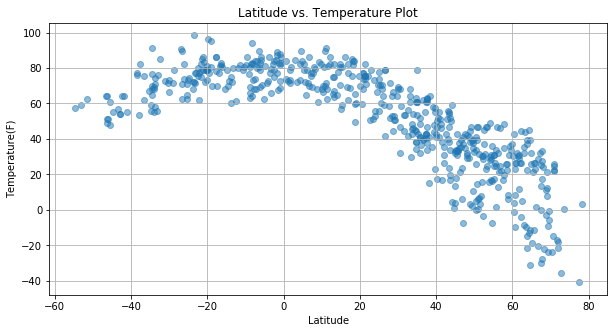

In [14]:
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Temperature Plot')
plt.scatter(weather_df['Lat'],weather_Max_f, marker = "o",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Temperature"+'(F)')
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

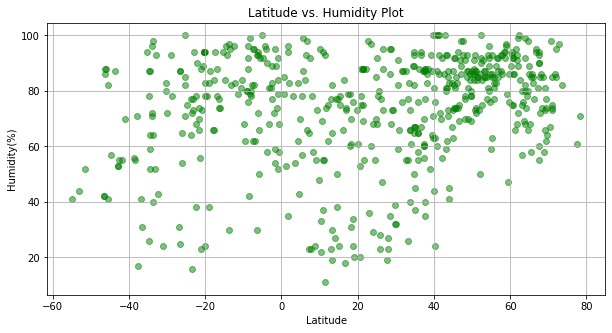

In [15]:
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Humidity Plot')
plt.scatter(weather_df['Lat'],weather_df['Humidity'], marker = "o",alpha=.5, color="g")
plt.xlabel("Latitude")
plt.ylabel("Humidity"+'(%)')
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

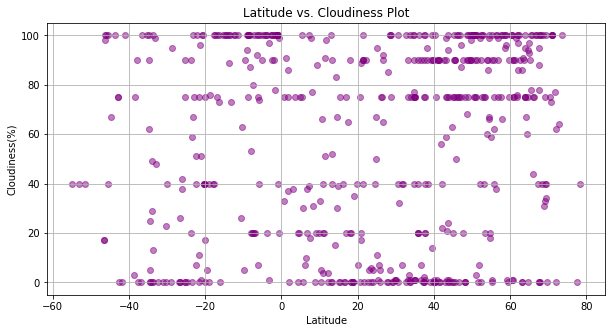

In [16]:
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Cloudiness Plot')
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], marker = "o", alpha=.5,color='purple')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness"+'(%)')
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

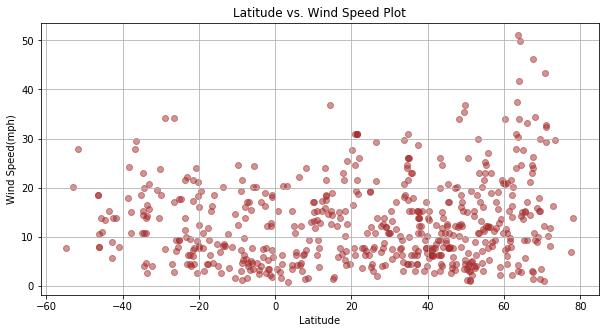

In [17]:

plt.figure(figsize=(10,5))
plt.title('Latitude vs. Wind Speed Plot')
plt.scatter(weather_df['Lat'],(weather_df['Wind Speed']*3), marker = "o",alpha=.5, color='brown')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed"+'(mph)')
plt.grid(True)
plt.show()

In [18]:
# 3 obsarvations need to be written as well.